<a href="https://colab.research.google.com/github/styavit/Collaboratory/blob/main/Image_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # We'll use layers module more directly for CNNs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


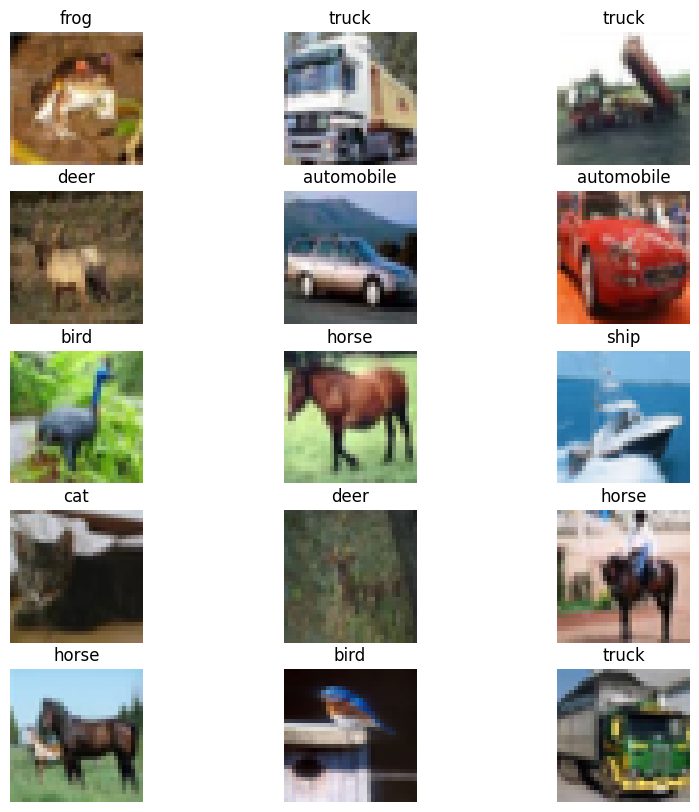

Pixel value range (min-max): 0 - 255


In [3]:
print("Shape of x_train:", x_train.shape)  # Expected: (50000, 32, 32, 3) -> 50,000 images, 32x32 pixels, 3 color channels (RGB)
print("Shape of y_train:", y_train.shape)  # Expected: (50000, 1) -> Labels are arrays of shape (1,)
print("Shape of x_test:", x_test.shape)    # Expected: (10000, 32, 32, 3)
print("Shape of y_test:", y_test.shape)    # Expected: (10000, 1)

# Define class names for CIFAR-10 for better visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display a few sample images
plt.figure(figsize=(10,10))
for i in range(15): # Display first 15 images
    plt.subplot(5, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]]) # y_train[i] is an array like [6], so y_train[i][0] gives the integer label
    plt.axis('off')
plt.show()

# Check pixel value range
print("Pixel value range (min-max):", np.min(x_train[0]), "-", np.max(x_train[0])) # Expected: 0 - 255

In [4]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [8]:
num_classes = 10
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

print("Shape of y_train_categorical:", y_train_categorical.shape) # Expected: (50000, 10)
print(y_train_categorical[1])

Shape of y_train_categorical: (50000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
model = keras.Sequential([
    # Convolutional Block 1
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    # 32 filters, each 3x3. 'padding="same"' means output feature map has same HxW as input.
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Reduces HxW by factor of 2.

    # Convolutional Block 2
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Block 3 (Optional, for a slightly deeper model)
    # layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    # layers.MaxPooling2D(pool_size=(2, 2)),

    # Flattening and Dense Layers
    layers.Flatten(), # Flattens the 3D output from conv/pool layers into a 1D vector
    layers.Dense(units=128, activation='relu'), # A standard dense hidden layer
    layers.Dropout(0.5), # Dropout for regularization
    layers.Dense(units=num_classes, activation='softmax') # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
batch_size = 64 # Can experiment with 32, 64, 128
epochs = 25     # Start with 15-25 epochs for a basic CNN on CIFAR-10; can go higher

history = model.fit(x_train_normalized, y_train_categorical,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1) # Or use validation_data=(x_val, y_val)

Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3315 - loss: 1.8305 - val_accuracy: 0.5604 - val_loss: 1.2658
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5300 - loss: 1.3094 - val_accuracy: 0.6308 - val_loss: 1.0574
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5866 - loss: 1.1631 - val_accuracy: 0.6564 - val_loss: 0.9851
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6250 - loss: 1.0613 - val_accuracy: 0.6784 - val_loss: 0.9192
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6549 - loss: 0.9800 - val_accuracy: 0.6892 - val_loss: 0.8887
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6718 - loss: 0.9261 - val_accuracy: 0.7072 - val_loss: 0.8425
Epoch 7/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6873 - loss: 0.8820 - val_accuracy: 0.7168 - val_loss: 0.8507
Epoch 8/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6999 - loss: 0.8417 - val_accuracy: 0

In [12]:
loss, accuracy = model.evaluate(x_test_normalized, y_test_categorical, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 1.0016
Test Accuracy: 0.7119


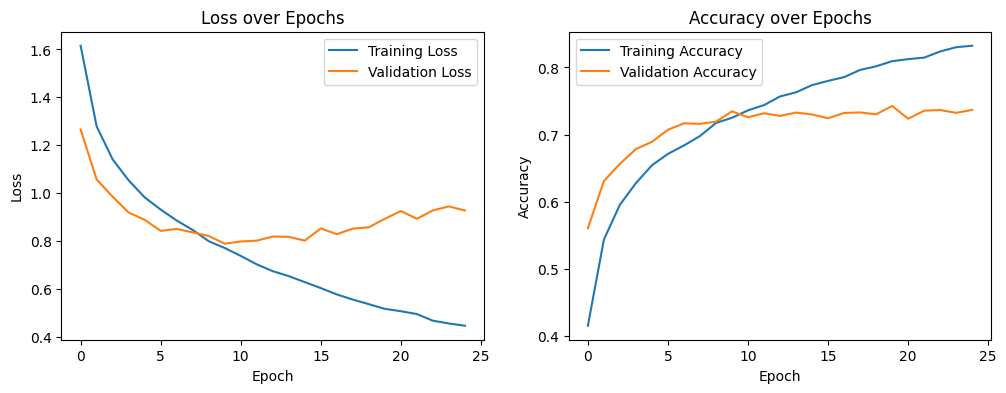

In [13]:
plt.figure(figsize=(12, 4))
# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


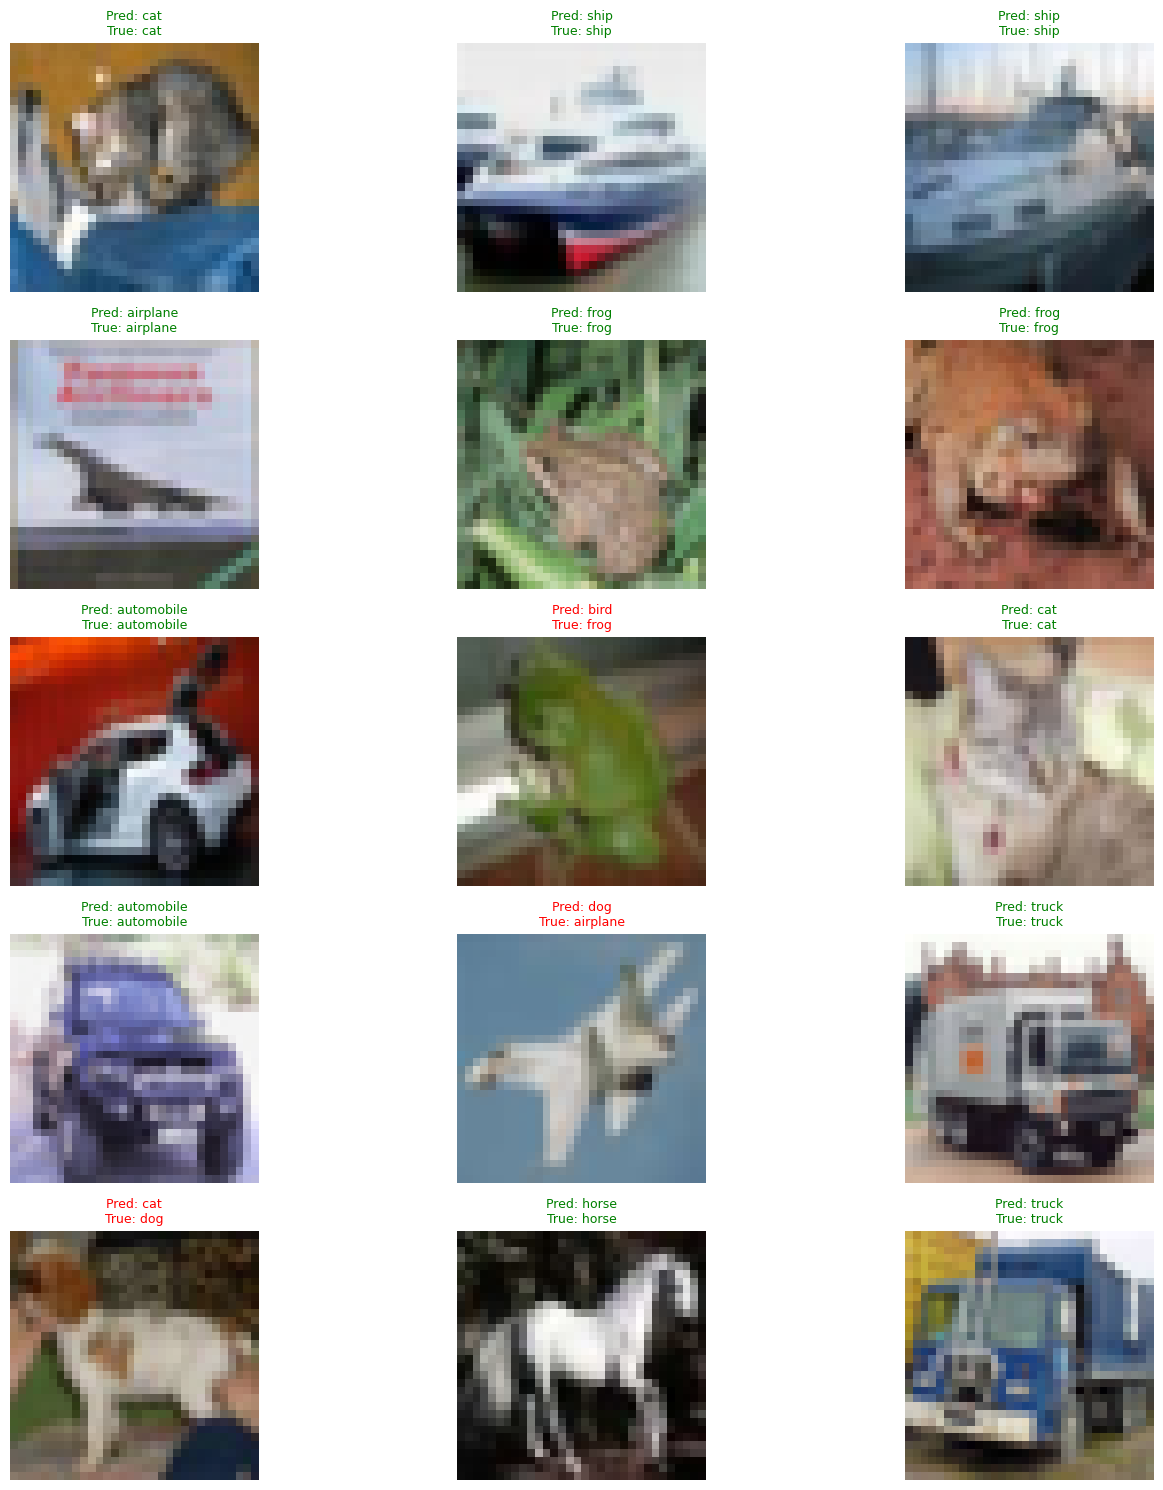

In [14]:
predictions = model.predict(x_test_normalized)

plt.figure(figsize=(15, 15))
for i in range(15): # Display first 15 test images and their predictions
    plt.subplot(5, 3, i+1)
    plt.imshow(x_test[i]) # Show original test image (not normalized for display)
    predicted_label_index = np.argmax(predictions[i])
    true_label_index = y_test[i][0]
    predicted_class = class_names[predicted_label_index]
    true_class = class_names[true_label_index]
    color = 'green' if predicted_label_index == true_label_index else 'red'
    plt.title(f"Pred: {predicted_class}\nTrue: {true_class}", color=color, fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()